<a href="https://colab.research.google.com/github/blackgreenc/AI/blob/main/school_project123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
!pip install yfinance
import yfinance as yf #야후 파이낸스 데이터
import datetime

     |████████████████████████████████| 6.3 MB 10.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=1d9fb8e6fab8bfeb5a916a67a29b2406a1c15248e5827c13f8e5c7d0147c004b
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


There are251observations in the training data
There are3729observations in the training data


,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2007-01-03,2.57,3.08,3.09,2.92,2.99,1238319600
2007-01-04,2.63,3.00,3.07,2.99,3.06,847260400
2007-01-05,2.61,3.06,3.08,3.01,3.04,834741600
2007-01-08,2.62,3.07,3.09,3.05,3.05,797106800
2007-01-09,2.84,3.09,3.32,3.04,3.31,3349298400
2007-01-10,2.97,3.38,3.49,3.34,3.46,2952880000
2007-01-11,2.94,3.43,3.46,3.40,3.42,1440252800
2007-01-12,2.90,3.38,3.39,3.33,3.38,1312690400
2007-01-16,2.98,3.42,3.47,3.41,3.47,1244076400


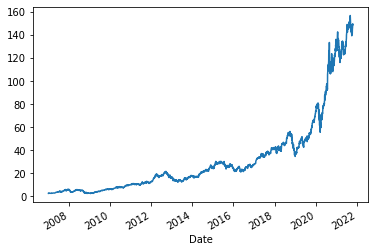

In [ ]:
# 나스닥 100
AAPL  = yf.download('AAPL',
                     start = '2007-01-01',
                     end = '2021-10-25',
                     progress = False)

data = AAPL[['Adj Close', 'Open', 'High', 'Low', "Close","Volume"]].round(2)

print("There are" + str(data[:"2007"].shape[0]) + "observations in the training data")
print("There are" + str(data[:"2021"].shape[0]) + "observations in the training data")


data['Adj Close'].plot()
data.shape
data.head(10)

In [ ]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [ ]:
seq_len = 30
sequence_length = seq_len + 1
,
result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [ ]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((3328, 30, 1), (370, 30, 1))

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=50)

Epoch 1/50
333/333 [==============================] - 13s 28ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 2/50
 84/333 [======>.......................] - ETA: 6s - loss: 5.8178e-04

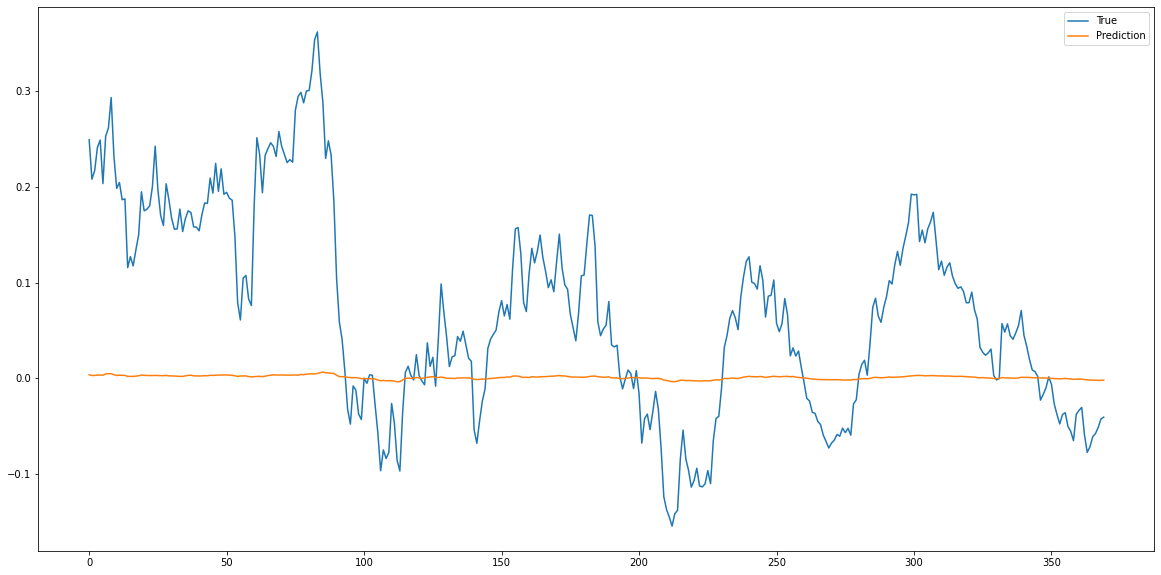

In [ ]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [ ]:
# 예측성능 출력지표들 
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def confirm_result(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    # 실제 값과 예측 값의 차이를 절댓값으로 변환해 평균한 것

    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    # MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 쓰는 것입니다.
    
    MSLE = mean_squared_log_error(y_test, y_pred)
    # MSE에 로그를 적용해준 지표입니다. log(y)가 아니라 log(y+1)입니다. y=0일 때, log(y)는 마이너스 무한대이므로 이를 보정해주기 위해 +1을 한 것입니다. 

    RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))
    # RMSE에 로그를 적용해준 지표입니다.

    R2 = r2_score(y_test, y_pred)
    # R² 는 분산 기반으로 예측 성능을 평가합니다. 1에 가까울수록 예측 정확도가 높습니다.
    # R² = 예측값 Variance / 실제값 Variance
    
    Result = pd.DataFrame(data = [MAE, RMSE, RMSLE, R2],
                          index = ['MAE', 'RMSE', 'RMSLE', 'R2'],
                          columns = ['Results'])
    
    return Result

In [ ]:
confirm_result(y_test, pred)

ValueError: ignored